# Optimise a synapse

This example is based on ```optimiseFullOnlyOne.sh``` which uses ```optimise_synapses_full.py``` which runs in parallel, this example runs in serial.

The code uses ```neuron_set.json``` to define which neurons we use, and their properties and ```model_bounds.json``` to specify parameter ranges.

Before running, make sure the NEURON mod files are compiled.

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import os
from optimise_synapses_full import OptimiseSynapsesFull
data_file = "../example_data/10_MSN12_GBZ_CC_H20.json"
synapse_param_file = "../example_data/M1LH-contra_dSPN.json"
ly = OptimiseSynapsesFull(
    snudda_data="../../BasalGangliaData/data",
    data_file=data_file,
    synapse_parameter_file=synapse_param_file,
    synapse_type="glut",
    load_parameters=True,
    d_view=None,        
    role="master",
    pretty_plot=True
)


--No graphics will be displayed.


Init optMethod = sobol
Loading ../example_data/10_MSN12_GBZ_CC_H20.json
Baseline voltage: -78.9731 (mV)
Reading synapse parameters from ../example_data/M1LH-contra_dSPN.json
Loading model bounds from model_bounds.json
No dView, no parallel
OptimiseSynapseFull: Init done


In [3]:
from neuron import h, load_mechanisms

# adjust path if needed, e.g. "./x86_64" or the full path
load_mechanisms("/cfs/klemming/home/m/metog/BasalGangliaData/data/neurons/mechanisms")

True

setup_model: synapse_position-override: (array([20, 20, 20, 20, 20, 20, 20, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 34, 20]), array([0.97459209, 0.94222174, 0.97115817, 0.90464425, 0.90681573,
       0.93087559, 0.97357064, 0.86164376, 0.89328311, 0.98478339,
       0.98632063, 0.97002186, 0.89905673, 0.97044896, 0.89890451,
       0.98452314, 0.93507123, 0.95778879, 0.86373897, 0.97060419]))
Holding voltage: -0.079 V
Stim times: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 1.  ] s
Synapse type: glut
Using morphology: /cfs/klemming/home/m/metog/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20220620/morphology
Setting resting voltage to -79.000 mV
Setting parameters: tau1_ampa = 1.0925303972077076 (neuron natural units)
Setting parameters: tau2_ampa = 4.437072205337933 (neuron natural units)
Setting parameters: tau3_ampa = 119.98882942221262 (neuron natural units)
Setting parameters: I2_ampa = -1.9886844552485996 (neuron natural units)
Setting 

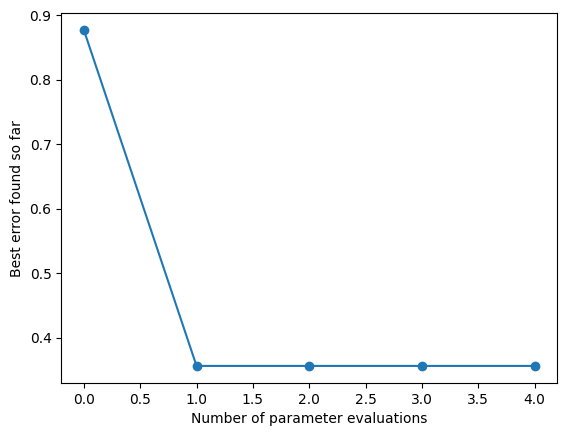

In [4]:
ly.parallel_optimise_single_cell(n_trials=5, post_opt=False)

In [ ]:
t_exp,v_exp,t_sim,v_sim =ly.plot_data(show=True, pretty_plot=True, skip_time=0)
# black is model, red is data


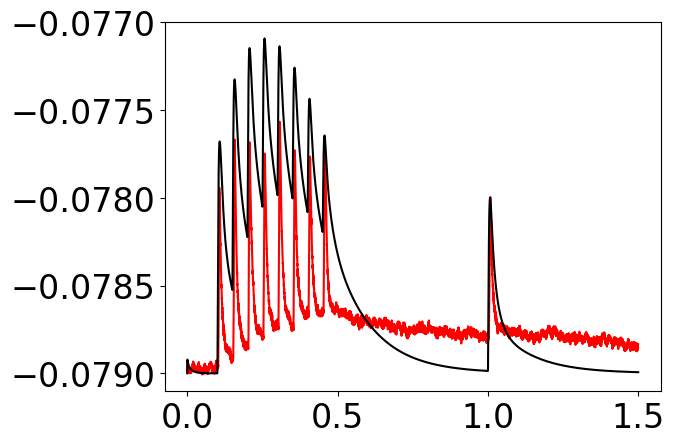

In [ ]:
# best scalar to match sim to exp
import numpy as np
import matplotlib.pyplot as plt

baseline = -0.079

# deflections from baseline
dv_exp = v_exp - baseline
dv_sim = v_sim - baseline

# find best scaling factor alpha for the deflection
#alpha = np.dot(dv_exp, dv_sim) / np.dot(dv_sim, dv_sim)

# scale the deflection, then add baseline back
dv_sim_scaled = 0.2 * dv_sim
v_sim_scaled = baseline + dv_sim_scaled

plt.plot(t_exp, v_exp, 'r', label='Experimental Data')
plt.plot(t_sim, v_sim_scaled, 'k', label='Scaled Simulation')


In [1]:
# run in ipyparallel
import os
os.environ["IPYTHONDIR"] = os.path.join(os.path.abspath(os.getcwd()), ".ipython")
os.environ["IPYTHON_PROFILE"] = "default"
os.system("ipcluster start --n=20 --profile=$IPYTHON_PROFILE --ip=127.0.0.1 --log-level ERROR 2> parallel-log.txt &")

import time
time.sleep(20) # Wait for ipcluster to start


In [2]:
import os
from optimise_synapses_full import OptimiseSynapsesFull
from ipyparallel import Client

compile_mod = True

data_file = "../example_data/10_MSN12_GBZ_CC_H20.json"
synapse_parameters = "../example_data/M1LH-contra_dSPN.json"


rc = Client(profile="default")   # connects to running ipcluster
d_view = rc[:]                   # all engines
opt_method = "sobol"

log_file_name = os.path.join("logs", f"{os.path.basename(data_file)}-log.txt")

if not os.path.exists("logs/"):
    os.makedirs("logs/")

ly = OptimiseSynapsesFull(snudda_data="../../BasalGangliaData/data",
                          data_file=data_file,
                          synapse_parameter_file=synapse_parameters,
                          synapse_type="glut", d_view=d_view,
                          role="master",
                          log_file_name=log_file_name, 
                          opt_method=opt_method)

--No graphics will be displayed.


Init optMethod = sobol
Log file: logs/10_MSN12_GBZ_CC_H20.json-log.txt
Loading ../example_data/10_MSN12_GBZ_CC_H20.json
Baseline voltage: -78.9731 (mV)
Reading synapse parameters from ../example_data/M1LH-contra_dSPN.json
Loading model bounds from model_bounds.json
importing os on engine(s)
importing RunSynapseRun from run_synapse_run on engine(s)
importing NumpyEncoder from optimise_synapses_full on engine(s)
importing OptimiseSynapsesFull from optimise_synapses_full on engine(s)
Setting up workers: 2025-12-09 15:12:55
OptimiseSynapseFull: Init done


### Run the optimisation

Increase n_trials to get a proper optimisation. Also consider running it in parallel using ```optimiseFullOneSynapse.sh```

In [ ]:
ly.parallel_optimise_single_cell(n_trials=5000, post_opt=False)

setup_model: synapse_position-override: (array([20, 20, 20, 20, 20, 20, 20, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 34, 20]), array([0.97459209, 0.94222174, 0.97115817, 0.90464425, 0.90681573,
       0.93087559, 0.97357064, 0.86164376, 0.89328311, 0.98478339,
       0.98632063, 0.97002186, 0.89905673, 0.97044896, 0.89890451,
       0.98452314, 0.93507123, 0.95778879, 0.86373897, 0.97060419]))
Holding voltage: -0.079 V
Stim times: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 1.  ] s
Synapse type: glut
Using morphology: /cfs/klemming/home/m/metog/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20220620/morphology
Setting resting voltage to -79.000 mV
Setting parameters: tau1_ampa = 1.0925303972077076 (neuron natural units)
Setting parameters: tau2_ampa = 4.437072205337933 (neuron natural units)
Setting parameters: tau3_ampa = 119.98882942221262 (neuron natural units)
Setting parameters: I2_ampa = -1.9886844552485996 (neuron natural units)
Setting 

In [ ]:
os.system("ipcluster stop")

setup_model: synapse_position-override: (array([20, 20, 20, 20, 20, 20, 20, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 34, 20]), array([0.97459209, 0.94222174, 0.97115817, 0.90464425, 0.90681573,
       0.93087559, 0.97357064, 0.86164376, 0.89328311, 0.98478339,
       0.98632063, 0.97002186, 0.89905673, 0.97044896, 0.89890451,
       0.98452314, 0.93507123, 0.95778879, 0.86373897, 0.97060419]))
Holding voltage: -0.079 V
Stim times: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 1.  ] s
Synapse type: glut
Using morphology: /Users/peirui/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20220620/morphology
Setting resting voltage to -79.000 mV
Setting parameters: tau1_ampa = 1.0925303972077076 (neuron natural units)
Setting parameters: tau2_ampa = 4.437072205337933 (neuron natural units)
Setting parameters: tau3_ampa = 119.98882942221262 (neuron natural units)
Setting parameters: I2_ampa = -1.9886844552485996 (neuron natural units)
Setting parameters: I

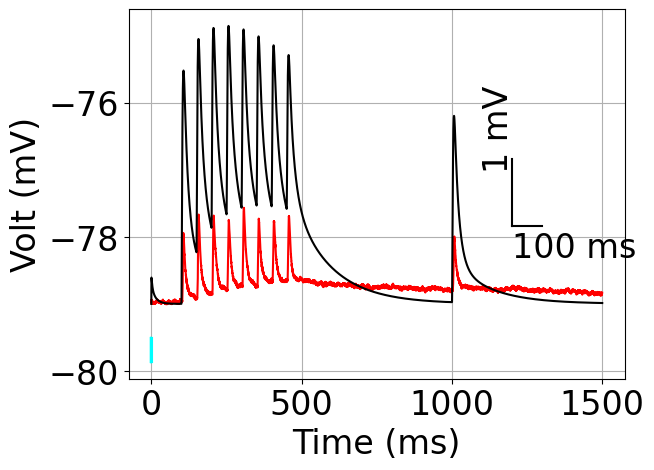

In [ ]:
t_exp,v_exp,t_sim,v_sim =ly.plot_data(show=True, pretty_plot=True, skip_time=0)
# black is model, red is data

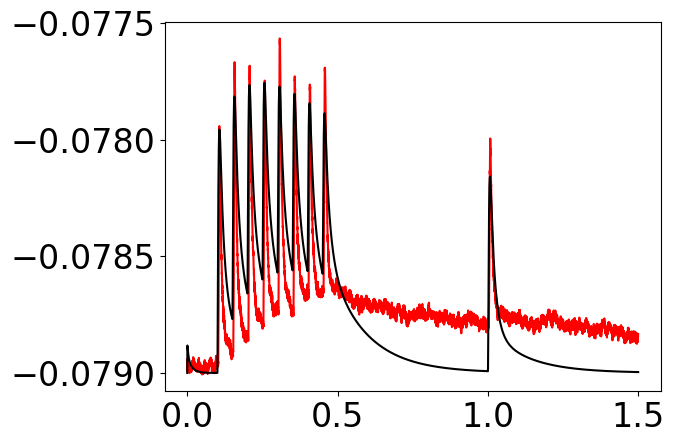

In [ ]:
# best scalar to match sim to exp
import numpy as np
import matplotlib.pyplot as plt

baseline = -0.079

# deflections from baseline
dv_exp = v_exp - baseline
dv_sim = v_sim - baseline

# find best scaling factor alpha for the deflection
#alpha = np.dot(dv_exp, dv_sim) / np.dot(dv_sim, dv_sim)

# scale the deflection, then add baseline back
dv_sim_scaled = 0.3 * dv_sim
v_sim_scaled = baseline + dv_sim_scaled

plt.plot(t_exp, v_exp, 'r', label='Experimental Data')
plt.plot(t_sim, v_sim_scaled, 'k', label='Scaled Simulation')


In [ ]:
from snudda.synaptic_fitting.parameter_bookkeeper import ParameterBookkeeper
synapse_parameter_data = ParameterBookkeeper(old_book_file=data_file+"-parameters-full.json", n_max=20)


best_dataset = synapse_parameter_data.get_best_dataset()
best_dataset

OrderedDict([('parameters',
              array([1.36216431e-02, 5.08497430e-01, 1.12540994e+00, 2.59094212e-01,
                     1.71905518e-11])),
             ('section_id',
              array([20, 20, 20, 20, 20, 20, 20, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20,
                     20, 34, 20])),
             ('section_x',
              array([0.97459209, 0.94222174, 0.97115817, 0.90464425, 0.90681573,
                     0.93087559, 0.97357064, 0.86164376, 0.89328311, 0.98478339,
                     0.98632063, 0.97002186, 0.89905673, 0.97044896, 0.89890451,
                     0.98452314, 0.93507123, 0.95778879, 0.86373897, 0.97060419])),
             ('error', 0.25852090495699)])